In [1]:
from conx import Network, Layer

Using Theano backend.


In [2]:
net = Network("MNIST")
net.add(Layer("input", shape=784, vshape=(28, 28), colormap="hot", minmax=(0,1)))
net.add(Layer("hidden1", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("hidden2", shape=512, vshape=(16,32), activation='relu', dropout=0.2))
net.add(Layer("output", shape=10, activation='softmax'))

net.connect('input', 'hidden1')
net.connect('hidden1', 'hidden2')
net.connect('hidden2', 'output')

In [3]:
net

<Network name='MNIST'>

In [4]:
net.compile(loss='mean_squared_error',
            optimizer='sgd')

In [5]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

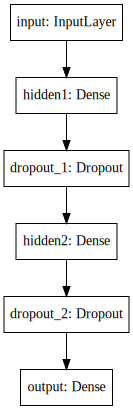

In [6]:
SVG(model_to_dot(net.model).create_svg())

In [7]:
net.load_keras_dataset('mnist')
net.rescale_inputs((0,255), (0,1), 'float32')
net.shuffle_dataset()
net.reshape_inputs(784)
net.split_dataset(100)
net.set_targets_to_categories(10)
net.summary_dataset()

Loading mnist dataset...
70000 train inputs, 0 test inputs
Set 70000 inputs and targets
Input data shape: (28, 28), range: (0, 255), type: uint8
No targets
Inputs rescaled to float32 values in the range 0 - 1
Shuffled all 70000 inputs
Input data shape: (784,), range: (0.0, 1.0), type: float32
Split dataset into:
   100 train inputs
   69900 test inputs
Generated 70000 target vectors from labels
100 train inputs, 69900 test inputs
Set 70000 inputs and targets
Input data shape: (784,), range: (0.0, 1.0), type: float32
Target data shape: (10,), range: (0, 0), type: uint8


<IPython.core.display.Javascript object>

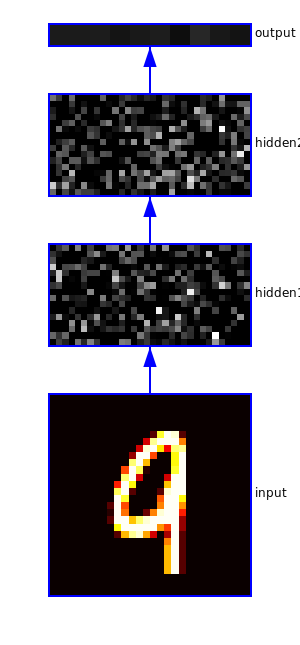

In [8]:
net

In [9]:
net.propagate(net.get_input(10))

[0.10196783,
 0.12786853,
 0.10001326,
 0.091457188,
 0.094198786,
 0.11616131,
 0.056512345,
 0.12363859,
 0.10668452,
 0.081497625]

In [11]:
net.train(100, report_rate=5)
#net.test()

Training...
Epoch 1/100
100/100 [==============================] - 0s - loss: 0.0915 - acc: 0.1300
Epoch 2/100
100/100 [==============================] - 0s - loss: 0.0911 - acc: 0.1600
Epoch 3/100
100/100 [==============================] - 0s - loss: 0.0916 - acc: 0.1200
Epoch 4/100
100/100 [==============================] - 0s - loss: 0.0904 - acc: 0.1400
Epoch 5/100
100/100 [==============================] - 0s - loss: 0.0908 - acc: 0.1700
Epoch 6/100
100/100 [==============================] - 0s - loss: 0.0909 - acc: 0.1400
Epoch 7/100
100/100 [==============================] - 0s - loss: 0.0907 - acc: 0.1200
Epoch 8/100
100/100 [==============================] - 0s - loss: 0.0908 - acc: 0.1100
Epoch 9/100
100/100 [==============================] - 0s - loss: 0.0904 - acc: 0.1300
Epoch 10/100
100/100 [==============================] - 0s - loss: 0.0911 - acc: 0.1600
Epoch 11/100
100/100 [==============================] - 0s - loss: 0.0915 - acc: 0.1500
Epoch 12/100
100/100 [=======

100/100 [==============================] - 0s - loss: 0.0902 - acc: 0.1700
Epoch 94/100
100/100 [==============================] - 0s - loss: 0.0900 - acc: 0.1600
Epoch 95/100
100/100 [==============================] - 0s - loss: 0.0900 - acc: 0.2000
Epoch 96/100
100/100 [==============================] - 0s - loss: 0.0905 - acc: 0.1900
Epoch 97/100
100/100 [==============================] - 0s - loss: 0.0905 - acc: 0.1200
Epoch 98/100
100/100 [==============================] - 0s - loss: 0.0900 - acc: 0.1700
Epoch 99/100
100/100 [==============================] - 0s - loss: 0.0901 - acc: 0.1500
Epoch 100/100
100/100 [==============================] - 0s - loss: 0.0903 - acc: 0.1500
Epoch #  110 | train loss 0.09147 | train acc 0.13000 | validate% 0.00000


In [12]:
import time
for i in range(10):
    net.propagate(net.get_input(i))
    time.sleep(1)